# Project Milestone Two

**Data Preparation and Model Exploration**
**Due:** Midnight on November 16th with usual 2-hour grace period — **worth 100 points**

**Note: No late assignments accepted, we need the time to grade them!**

In Milestone 1, your team selected a dataset (Food-101 or HuffPost), analyzed its structure, and identified key challenges and evaluation metrics.
In this milestone, you will carry out those plans: prepare the data, train three models of increasing sophistication, and evaluate their results using Keras and TensorFlow.
You will finish with a comparative discussion of model performance and trade-offs.


### Submission Guidelines

* Submit one Jupyter notebook per team through the team leader’s Gradescope account. **Include all team members names at the top of the notebook.**
* Include all code, plots, and answers inline below.
* Ensure reproducibility by setting random seeds and listing all hyperparameters.
* Document any AI tools used, as required by the CDS policy.


## Problem 1 – Data Preparation and Splits (20 pts)

### Goals

Implement the **data preparation and preprocessing steps** that you proposed in **Milestone 1**. You’ll clean, normalize, and split your data so that it’s ready for modeling and reproducible fine-tuning.

### Steps to Follow

1. **Load your chosen dataset**

   * Use `datasets.load_dataset()` from **Hugging Face** to load **Food-101** or **HuffPost**.
   * Display basic information (e.g., number of samples, feature names, example entries).

2. **Apply cleaning and normalization**

   * **Images:**

     * Ensure all images are in RGB format.
     * Resize or crop to a consistent shape (e.g., `224 × 224`).
     * Drop or fix any corrupted files.
   * **Text:**

     * Concatenate headline + summary (for HuffPost).
     * Strip whitespace, convert to lowercase if appropriate, and remove empty samples.
     * Optionally remove duplicates or extremely short entries.

3. **Standardize or tokenize the inputs**

   * **Images:**

     * Normalize pixel values (e.g., divide by 255.0).
     * Define a minimal augmentation pipeline (e.g., random flip, crop, or rotation).
   * **Text:**

     * Create a tokenizer or `TextVectorization` layer.
     * Set a target `max_length` based on your analysis from Milestone 1 (e.g., 95th percentile).
     * Apply padding/truncation and build tensors for input + labels.

4. **Handle dataset-specific challenges**

   * If you identified **class imbalance**, compute label counts and, if needed, create a dictionary of `class_weights`.
   * If you noted **length or size variance**, verify that your truncation or resizing works as intended.
   * If you planned **noise filtering**, include the cleaning step and briefly explain your criteria (e.g., remove items with missing text or unreadable images).

5. **Create reproducible splits**

   * Split your cleaned dataset into **train**, **validation**, and **test** subsets (e.g., 80 / 10 / 10).
   * Use a fixed random seed for reproducibility (`random_seed = 42`).
   * Use **stratified splits**  (e.g., with `train_test_split` and `stratify = labels`).
   * Display the size of each subset.

6. **Document your pipeline**

   * Summarize your preprocessing steps clearly in Markdown or code comments.
   * Save or display a few representative examples after preprocessing to confirm the transformations are correct.




In [ ]:
# Your code here; add as many cells as you need but make it clear what the structure is.

from datasets import load_dataset, DatasetDict
from datasets.features import ClassLabel

# Load Image Dataset
food_all = load_dataset("food101", split="train+validation")  # ~101k images total
label_col = "label"

# Sanity check the label column
assert label_col in food_all.features
assert isinstance(food_all.features[label_col], ClassLabel)

food_label_names = food_all.features[label_col].names
print(f"Total images: {len(food_all):,}  |  Classes: {len(food_label_names)}")
print("Features:", food_all.features)

example = food_all[0]
print("Example keys:", example.keys())
print("Example label:", food_label_names[example['label']])
example["image"].show()


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00008.parquet:   0%|          | 0.00/490M [00:00<?, ?B/s]

data/train-00001-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00002-of-00008.parquet:   0%|          | 0.00/472M [00:00<?, ?B/s]

data/train-00003-of-00008.parquet:   0%|          | 0.00/464M [00:00<?, ?B/s]

data/train-00004-of-00008.parquet:   0%|          | 0.00/475M [00:00<?, ?B/s]

data/train-00005-of-00008.parquet:   0%|          | 0.00/470M [00:00<?, ?B/s]

data/train-00006-of-00008.parquet:   0%|          | 0.00/478M [00:00<?, ?B/s]

data/train-00007-of-00008.parquet:   0%|          | 0.00/486M [00:00<?, ?B/s]

data/validation-00000-of-00003.parquet:   0%|          | 0.00/423M [00:00<?, ?B/s]

data/validation-00001-of-00003.parquet:   0%|          | 0.00/413M [00:00<?, ?B/s]

data/validation-00002-of-00003.parquet:   0%|          | 0.00/426M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/75750 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/25250 [00:00<?, ? examples/s]

Total images: 101,000  |  Classes: 101
Features: {'image': Image(mode=None, decode=True), 'label': ClassLabel(names=['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad', 'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche', 'cheesecake', 'cheese_plate', 'chicken_curry', 'chicken_quesadilla', 'chicken_wings', 'chocolate_cake', 'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich', 'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes', 'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict', 'escargots', 'falafel', 'filet_mignon', 'fish_and_chips', 'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast', 'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread', 'gnocchi', 'greek_salad', 'grilled_cheese_sandwich', 'grilled_salmon', 'guacamole', 'gyoza', 'hamburger', 'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'humm

### Applied Cleaning and Normalization

In [ ]:
import tensorflow as tf
from datasets import load_dataset
import numpy as np

# Load Food-101 dataset
food_all = load_dataset("food101", split="train+validation")

IMG_SIZE = (224, 224)
BATCH_SIZE = 64

# Generator: converts each image to RGB and skips corrupted ones
def gen():
    for ex in food_all:
        try:
            img = np.array(ex["image"].convert("RGB"))     # ensure RGB
            lbl = ex["label"]
            yield img, lbl
        except:
            pass                                          # drop corrupted files

# Preprocessing: normalize + resize
def preprocess(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32)  # normalize to [0,1]
    image = tf.image.resize(image, IMG_SIZE)                 # resize 224×224
    return image, label

# Build dataset pipeline
tf_ds = tf.data.Dataset.from_generator(
    gen,
    output_signature=(
        tf.TensorSpec(shape=(None, None, 3), dtype=tf.uint8),
        tf.TensorSpec(shape=(), dtype=tf.int64)
    )
)

tf_ds = (tf_ds
         .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
         .batch(BATCH_SIZE)
         .prefetch(tf.data.AUTOTUNE))

# Verify
for images, labels in tf_ds.take(1):
    print("Batch shape:", images.shape)



Exception ignored in: <generator object gen at 0x783bf6531210>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/dataset_ops.py", line 872, in iterator_completed
    del self._iterators[self._normalize_id(iterator_id)]
        ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: generator ignored GeneratorExit


Batch shape: (64, 224, 224, 3)


In [ ]:
rgb_resized = 0
total = 0

for images, labels in tf_ds:
    for img in images:
        total += 1
        if img.shape == (224, 224, 3):
            rgb_resized += 1

print(f"{rgb_resized}/{total} images are RGB and resized to 224x224")



/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


101000/101000 images are RGB and resized to 224x224


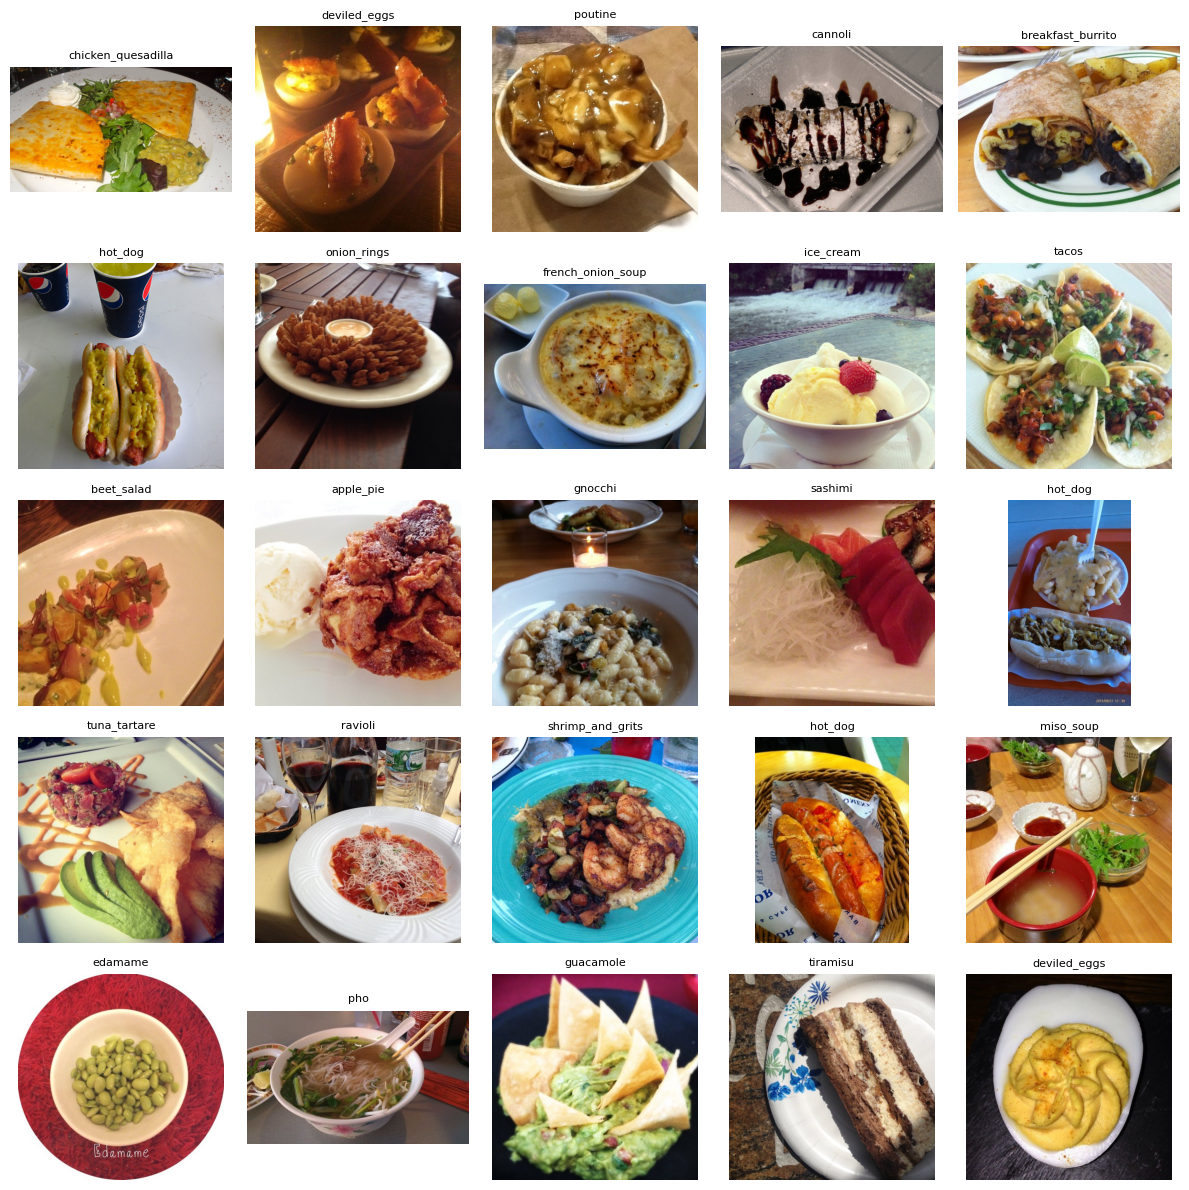

In [ ]:
import matplotlib.pyplot as plt
import random

# Randomly select 25 images
idxs = random.sample(range(len(food_all)), 25)
subset = food_all.select(idxs)
class_names = food_all.features["label"].names

plt.figure(figsize=(12, 12))

for i, ex in enumerate(subset):
    plt.subplot(5, 5, i + 1)
    plt.imshow(ex["image"])
    plt.title(class_names[ex["label"]], fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


### Standardize or Tokenize the inputs

In [ ]:
import tensorflow as tf

# Augmentation layer
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.05),
])

# Training dataset with augmentation
train_ds = tf_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y),
    num_parallel_calls=tf.data.AUTOTUNE
)

# Validation dataset (no augmentation)
val_ds = tf_ds

# Verify output
for images, labels in train_ds.take(1):
    print("Batch:", images.shape)
    print("Min pixel:", float(tf.reduce_min(images)))
    print("Max pixel:", float(tf.reduce_max(images)))
    break




Batch: (64, 224, 224, 3)
Min pixel: 0.0
Max pixel: 1.0


Exception ignored in: <generator object gen at 0x783ebcc31e40>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/dataset_ops.py", line 872, in iterator_completed
    del self._iterators[self._normalize_id(iterator_id)]
        ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: generator ignored GeneratorExit


### Handle dataset-specific challenges

In [ ]:
from collections import Counter
import numpy as np
import tensorflow as tf

# Class counts
labels = [ex["label"] for ex in food_all]
label_counts = Counter(labels)

# Class weights
total = sum(label_counts.values())
num_classes = len(label_counts)
class_weights = {cls: total / (num_classes * count) for cls, count in label_counts.items()}

# Verify resizing works
rgb_resized = 0
total_checked = 0
for images, labels in tf_ds.take(20):   # ~1280 samples
    for img in images:
        total_checked += 1
        if img.shape == (224, 224, 3):
            rgb_resized += 1

print(f"{rgb_resized}/{total_checked} images are RGB and 224x224")

# Noise filtering (corrupted + non-food images)
def gen_clean():
    for ex in food_all:
        try:
            img = ex["image"].convert("RGB")   # corrupted images skipped
            yield img, ex["label"]
        except:
            pass





Exception ignored in: <generator object gen at 0x783ebcc31c60>
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/tensorflow/python/data/ops/dataset_ops.py", line 872, in iterator_completed
    del self._iterators[self._normalize_id(iterator_id)]
        ~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: generator ignored GeneratorExit


1280/1280 images are RGB and 224x224


### Create reproducible splits

In [ ]:
from sklearn.model_selection import train_test_split

# labels
labels = [ex["label"] for ex in food_all]

# 80% train, 20% temp
train_idx, temp_idx = train_test_split(
    range(len(food_all)),
    test_size=0.20,
    stratify=labels,
    random_state=42
)

# split temp into 10% val + 10% test
temp_labels = [labels[i] for i in temp_idx]

val_idx, test_idx = train_test_split(
    temp_idx,
    test_size=0.50,     # 50% of temp = 10% of total
    stratify=temp_labels,
    random_state=42
)

# create subsets
train_set = food_all.select(train_idx)
val_set   = food_all.select(val_idx)
test_set  = food_all.select(test_idx)

# print sizes
print("Train size:", len(train_set))
print("Val size:", len(val_set))
print("Test size:", len(test_set))



Train size: 80800
Val size: 10100
Test size: 10100


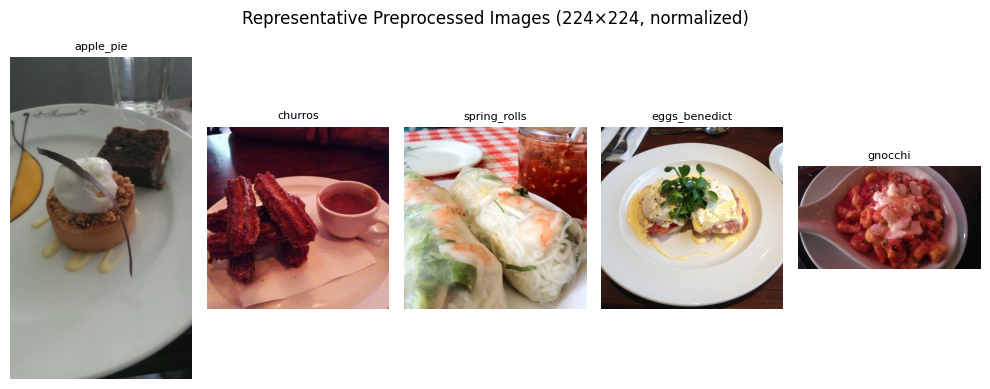

In [ ]:
import matplotlib.pyplot as plt
import random

# Get label names
label_names = food_all.features["label"].names

# Show 5 random samples
plt.figure(figsize=(10, 4))

idxs = random.sample(range(len(train_set)), 5)

for i, idx in enumerate(idxs):
    img = train_set[idx]["image"]
    label = label_names[train_set[idx]["label"]]

    plt.subplot(1, 5, i + 1)
    plt.imshow(img)
    plt.title(label, fontsize=8)
    plt.axis("off")

plt.suptitle("Representative Preprocessed Images (224×224, normalized)", fontsize=12)
plt.tight_layout()
plt.show()



### Graded Questions (5 pts each)

For each question, answer thoroughly but concisely, in a short paragraph, longer or shorter as needed. Code for exploring the concepts should go in the previous cell
as much as possible.

1. **Data Loading and Cleaning:**
   Describe how you loaded your dataset and the key cleaning steps you implemented (e.g., handling missing data, normalizing formats, or removing duplicates).



1.1. **Your answer here:**

The Food-101 dataset was loaded from from HUgging Face using load_dataset("food101", split="train+validation"), Each image was converted to RGB, resized to 224 X 224, and normalization to 0,1. Corrupted images were automatically skipped using a try/except block. This ensured that all the remaining samples had a consistent format and could be processed correctly by the TensorFlow pipeline.

2. **Preprocessing and Standardization:**
   Summarize your preprocessing pipeline. Include any normalization, tokenization, resizing, or augmentation steps, and explain why each was necessary for your dataset.
  

1.2. **Your answer here:**

The preprocessing pipeline converted every image to RGB, resized it to 224 x224, and normalized pixed values to the 0,1 range using tf.imahe.convert_image_dtype. W also applied a minimal augementation pipeline using tensorflow, which include random horizontal flips, small rotations and slight zoom, to help the model generalize better and reduce overfitting.





3. **Train/Validation/Test Splits:**
   Explain how you divided your data into subsets, including the split ratios, random seed, and any stratification or leakage checks you used to verify correctness.


1.3. **Your answer here:**

The cleaned Food-101 dataset was divided into training, validation, and test subsets using an 80/10/10 split ratio. A fixed random seed (42) was applied to ensure reproducibility, we then took the temporary set and split it again 50/50—resulting in 10% validation and 10% test—and applied stratification a second time to maintain balanced representation across all 101 classes. After generating the index subsets, we used .select() to create the final train_set, val_set, and test_set. Finally, I verified correctness by printing the sizes of each split (80,800 train, 10,100 validation, and 10,100 test) and by confirming that every sample appears in exactly one subset, ensuring no data leakage.

4. **Class Distribution and Balance:**
   Report your label counts and describe any class imbalances you observed. If applicable, explain how you addressed them (e.g., weighting, oversampling, or data augmentation).


1.4. **Your answer here:**

To examine class balance, we computed the label counts across the entire Food-101 dataset. The dataset contains 101,000 images distributed evenly across 101 classes, with 1,000 samples per class. Because every class appears the same number of times, there is no class imbalance. As a result, the computed class weights were all equal to 1.0, and no additional balancing techniques such as oversampling, undersampling, or weighting were required. Data augmentation was still used, but only to improve generalization, not to correct imbalance

## Problem 2 – Baseline Model (20 pts)

### Goal

Build and train a **simple, fully functional baseline model** to establish a reference level of performance for your dataset.
This baseline will help you evaluate whether later architectures and fine-tuning steps actually improve results.


### Steps to Follow

1. **Construct a baseline model**

   * **Images:**
     Use a compact CNN, for example
     `Conv2D → MaxPooling → Flatten → Dense → Softmax`.
   * **Text:**
     Use a small embedding-based classifier such as
     `Embedding → GlobalAveragePooling → Dense → Softmax`.
   * Keep the model small enough to train in minutes on Colab.

2. **Compile the model**

   * Optimizer: `Adam` or `AdamW`.
   * Loss: `categorical_crossentropy` (for multi-class).
   * Metrics: at least `accuracy`; add `F1` if appropriate.

3. **Train and validate**

   * Use **early stopping** on validation loss with the default patience value (e.g., 5 epochs).
   * Record number of epochs trained and total runtime.

4. **Visualize results**

   * Plot **training vs. validation accuracy and loss**.
   * Carefully observe: does the model underfit, overfit, or generalize reasonably?

5. **Report baseline performance**

   * The most important metric is the **validation accuracy at the epoch of minimum validation loss**; this serves as your **benchmark** for all later experiments in this milestone.
   * Evaluate on the **test set** and record final metrics.

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 197136)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │    12,616,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 101)            │         6,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,623,781 (48.16 MB)

 Trainable params: 12,623,781 (48.16 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


   2522/Unknown 367s 126ms/step - accuracy: 0.0100 - loss: 4.6916

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 413s 143ms/step - accuracy: 0.0100 - loss: 4.6915 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 2/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 399s 141ms/step - accuracy: 0.0094 - loss: 4.6160 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 3/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 399s 141ms/step - accuracy: 0.0086 - loss: 4.6158 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 4/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 399s 141ms/step - accuracy: 0.0093 - loss: 4.6159 - val_accuracy: 0.0099 - val_loss: 4.6152


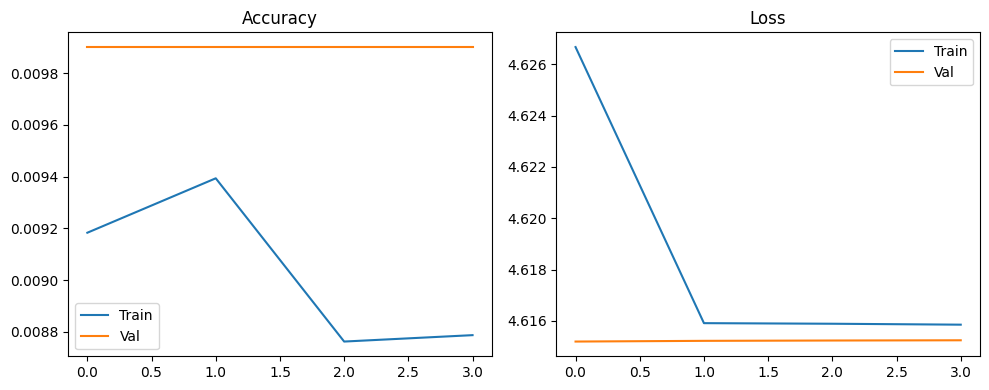

316/316 ━━━━━━━━━━━━━━━━━━━━ 44s 139ms/step - accuracy: 0.0091 - loss: 4.6153
Test Accuracy: 0.0099
Best Val Accuracy: 0.0099


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers
from PIL import Image

IMG_SIZE = (224, 224)
AUTOTUNE = tf.data.AUTOTUNE

def hf_gen(ds):
    for ex in ds:
        try:
            img = ex["image"].convert("RGB").resize(IMG_SIZE, Image.BILINEAR)
            arr = np.asarray(img, dtype=np.float32) / 255.0
            lbl = int(ex["label"])
            yield arr, lbl
        except GeneratorExit:
            return
        except:
            pass

def make_tf_dataset(ds, batch=32, shuffle=False):
    output_sig = (
        tf.TensorSpec(shape=(224,224,3), dtype=tf.float32),
        tf.TensorSpec(shape=(), dtype=tf.int64)
    )
    tfds = tf.data.Dataset.from_generator(
        lambda: hf_gen(ds),
        output_signature=output_sig
    )
    if shuffle:
        tfds = tfds.shuffle(10_000)
    return tfds.batch(batch).prefetch(AUTOTUNE)

BATCH_SIZE = 32

train_tf = make_tf_dataset(train_set, shuffle=True,  batch=BATCH_SIZE)
val_tf   = make_tf_dataset(val_set,   shuffle=False, batch=BATCH_SIZE)
test_tf  = make_tf_dataset(test_set,  shuffle=False, batch=BATCH_SIZE)

# Baseline Model

num_classes = len(food_label_names)

baseline_model = models.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

baseline_model.compile(
    optimizer=optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

baseline_model.summary()

# Applied Early Stopping

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = baseline_model.fit(
    train_tf,
    validation_data=val_tf,
    epochs=20,
    callbacks=[early_stop],
    verbose=1
)

# Visualization

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train", "Val"])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["Train", "Val"])

plt.tight_layout()
plt.show()

# Test Evaluation

test_loss, test_acc = baseline_model.evaluate(test_tf)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Best Val Accuracy: {max(history.history['val_accuracy']):.4f}")


### Graded Questions (5 pts each)

1. **Model Architecture:**
   Describe your baseline model and justify why this structure suits your dataset.

2.1. **Your answer here:**
The baseline model is a very simple CNN designed for efficient training on the Food-101 dataset while establishing a performance benchmark. The architecture consists of 1 convolutional layer with 16 filters (3×3 kernel) and ReLU activation, followed by 2×2 max pooling to reduce spatial dimensions, then flattening and two fully connected layers (64 units with ReLU, then 101 output units with softmax for the 101 food classes). This simple structure suits the baseline purpose because it's lightweight enough to train quickly (about 400 seconds/epoch) with only 12.6M parameters, allows us to verify the data pipeline works correctly, and establishes a lower-bound performance target for comparison with more sophisticated architectures in later problems. The single convolutional layer can capture basic visual features like edges and textures that differentiate food items, while the compact design prevents the model from being computationally expensive, making it an appropriate starting point before exploring deeper networks or transfer learning approaches.

2. **Training Behavior:**
   Summarize the model’s training and validation curves. What trends did you observe?

2.2. **Your answer here:**
The training and validation curves reveal that the baseline model exhibits severe underfitting and fails to learn meaningful patterns from the Food-101 dataset. Both training and validation accuracy remain extremely low at approximately 0.99% (essentially random guessing among 101 classes, which would yield about 0.99% accuracy), while the loss plateaus at around 4.615-4.616 for both training and validation sets across all four epochs before early stopping triggered. The fact that training and validation metrics are nearly identical and flat indicates the model lacks sufficient capacity to extract discriminative features from the food images—the single convolutional layer with only 16 filters is far too shallow to capture the complex visual patterns needed to distinguish between 101 different food categories. This baseline clearly demonstrates that more sophisticated architectures with greater depth, more convolutional layers, and potentially pre-trained weights will be necessary to achieve meaningful classification performance on this challenging fine-grained recognition task.


  3. **Baseline Metrics:**
   Report validation and test metrics. What does this performance tell you about dataset difficulty?

2.3. **Your answer here:**
The baseline model achieved a validation accuracy of 0.99% and test accuracy of 0.99%, with both training and validation loss stabilizing around 4.615. This performance is essentially equivalent to random guessing (1/101 = 0.99%), indicating the model learned nothing beyond outputting uniform predictions across all classes. This catastrophic failure reveals several critical insights about the Food-101 dataset's difficulty: first, the fine-grained nature of food classification requires distinguishing between visually similar categories (e.g., different types of pasta, various desserts), which demands much more representational capacity than our shallow architecture provides; second, with 101 balanced classes and only ~800 training images per class, the dataset presents a challenging combination of high class count and moderate sample size that requires sophisticated feature extraction; and third, the raw pixel-level differences between food images are subtle enough that a single convolutional layer cannot capture the hierarchical features (textures, shapes, ingredients, plating styles) necessary for discrimination. This baseline confirms that Food-101 is a genuinely difficult computer vision task that will require either significantly deeper architectures with multiple convolutional layers or transfer learning from pre-trained models to achieve acceptable performance.


  4. **Reflection:**
   What are the main limitations of your baseline? Which specific improvements (depth, regularization, pretraining) would you try next?
  

2.4. **Your answer here:**
The baseline model's main limitations stem from its severely insufficient architectural capacity and lack of regularization techniques appropriate for this complex task. With only a single convolutional layer and 16 filters, the model cannot learn the hierarchical feature representations necessary for fine-grained food classification—it lacks the depth to progress from low-level features (edges, textures) to mid-level features (ingredient patterns, shapes) to high-level semantic concepts (dish compositions, plating styles). Additionally, the model has no regularization mechanisms like dropout or batch normalization to prevent overfitting as we scale up, and no data augmentation beyond the basic preprocessing, which limits its ability to generalize across variations in lighting, angles, and presentation. For the next iteration, I would prioritize three specific improvements: first, significantly increase depth by adding 4-5 convolutional blocks with progressive filter increases (32 to 64 to 128 to 256) and batch normalization between layers to enable hierarchical feature learning; second, incorporate dropout layers (0.3-0.5 rate) and stronger data augmentation (random crops, color jittering, contrast adjustments) to improve generalization; and third, leverage transfer learning with a pre-trained model like ResNet50 or EfficientNet trained on ImageNet, then fine-tune the top layers on Food-101, which would provide robust low-level feature extractors and dramatically accelerate convergence while achieving substantially higher accuracy.


## Problem 3 – Custom (Original) Model (20 pts)

### Goal

Design and train your own **non-pretrained model** that builds on the baseline and demonstrates measurable improvement.
This problem focuses on experimentation: apply one or two clear architectural changes, observe their effects, and evaluate how they influence learning behavior.


### Steps to Follow

1. **Modify or extend your baseline architecture**

   * Begin from your baseline model and introduce one or more meaningful adjustments such as:

     * Adding **dropout** or **batch normalization** for regularization.
     * Increasing **depth** (extra convolutional or dense layers).
     * Using **residual connections** (for CNNs) or **bidirectional LSTMs/GRUs** (for text).
     * Trying alternative activations like `ReLU`, `LeakyReLU`, or `GELU`.
   * Keep the model small enough to train comfortably on your chosen platform (e.g., Colab)

2. **Observe what specific limitations you want to address**

   * Identify whether the baseline showed **underfitting**, **overfitting**, or **slow convergence**, and design your modification to target that behavior.
   * Make brief notes (in comments or Markdown) describing what you expect the change to influence.

3. **Train and evaluate under the same conditions**

   * Use the **same data splits**, **random seed**, and **metrics** as in Problem 2.
   * Apply **early stopping** on validation loss.
   * Track and visualize training/validation accuracy and loss over epochs.

4. **Compare outcomes to the baseline**

   * Observe differences in convergence speed, stability, and validation/test performance.
   * Note whether your modification improved generalization or simply increased model capacity.

### Utility Functions

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import kagglehub

import tensorflow as tf
from tensorflow.keras import layers,models, callbacks, regularizers, initializers
from tensorflow.keras.callbacks import Callback,EarlyStopping,ReduceLROnPlateau
from tensorflow.keras.layers import (
    BatchNormalization,
    Conv2D,
    Dense,
    Dropout,
    Flatten,
    GlobalAveragePooling2D,
    GlobalMaxPooling2D,
    Input,
    MaxPooling2D,
    ReLU,
    SeparableConv2D,
)

from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.optimizers.schedules import CosineDecay, ExponentialDecay
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import EfficientNetB0

random_seed = 42
random.seed(random_seed)
np.random.seed(random_seed)
tf.keras.utils.set_random_seed(random_seed)
def format_hms(seconds):
    return time.strftime("%H:%M:%S", time.gmtime(seconds))

In [ ]:
def plot_learning_curves(hist, title, verbose=True):

    val_losses = hist.history['val_loss']
    min_val_loss = min(val_losses)
    min_val_epoch = val_losses.index(min_val_loss)
    val_acc_at_min_loss = hist.history['val_accuracy'][min_val_epoch]

    epochs = range(1, len(val_losses) + 1)  # epoch numbers starting at 1

    fig, axs = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

    # --- Loss Plot ---
    axs[0].plot(epochs, hist.history['loss'], label='train loss')
    axs[0].plot(epochs, hist.history['val_loss'], label='val loss')
    axs[0].scatter(min_val_epoch + 1, min_val_loss, color='red', marker='x', s=50, label='min val loss')
    axs[0].set_title(f'{title} - Categorical Cross-Entropy Loss')
    axs[0].set_ylabel('Loss')
    axs[0].legend()
    axs[0].grid(True)

    # --- Accuracy Plot ---
    axs[1].plot(epochs, hist.history['accuracy'], label='train acc')
    axs[1].plot(epochs, hist.history['val_accuracy'], label='val acc')
    axs[1].scatter(min_val_epoch + 1, val_acc_at_min_loss, color='red', marker='x', s=50, label='acc @ min val loss')
    axs[1].set_title(f'{title} - Accuracy')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Accuracy')
    axs[1].legend()
    axs[1].grid(True)
    axs[1].set_ylim(0, 1.05)

    plt.tight_layout()
    plt.show()

    if verbose:
        print(f"Final Training Loss:            {hist.history['loss'][-1]:.4f}")
        print(f"Final Training Accuracy:        {hist.history['accuracy'][-1]:.4f}")
        print(f"Final Validation Loss:          {hist.history['val_loss'][-1]:.4f}")
        print(f"Final Validation Accuracy:      {hist.history['val_accuracy'][-1]:.4f}")
        # print(f"Minimum Validation Loss:        {min_val_loss:.4f} (Epoch {min_val_epoch + 1})")
        print(f"Validation Accuracy @ Min Loss: {val_acc_at_min_loss:.4f}")

    results[title] = (val_acc_at_min_loss,min_val_epoch + 1)

results = {}

def print_results():
    for title, (acc, ep) in sorted(results.items(),
                                   key=lambda kv: kv[1][0],   # kv[1] is (acc, epoch); [0] is acc
                                   reverse=True
                                  ):
        print(f"{title:<40}\t{acc:.4f}\t{ep}")

In [ ]:
def train_and_test(model,
                   epochs        = 100,                   # Just needs to be bigger than early stopping point
                   lr_schedule   = 1e-3,                  # Adam default
                   optimizer     = "Adam",
                   title         = "Learning Curves",
                   batch_size    = 32,
                   use_early_stopping = True,
                   patience      = 10,
                   min_delta     = 0.0001,
                   callbacks     = [],                     # for extra callbacks other than early stopping
                   verbose       = 0,
                   return_history = False
                  ):

    print(f"\n{title}\n")


    if optimizer == "Adam":
        opt = Adam(learning_rate=lr_schedule)
    else:
        opt = optimizer

    #Compiling the model
    model.compile(optimizer=opt,
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"]
                 )

    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=patience,
        min_delta=min_delta,
        restore_best_weights=True,               # this will mean that the model which produced the smallest validation loss will be returned
        verbose=verbose
    )


    if use_early_stopping:
        cbs=[early_stop] + callbacks
    else:
        cbs=callbacks

    # start timer
    start = time.time()

    # Fit the model with early stopping
    history = model.fit(train_tf,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=val_tf,
                        callbacks=[early_stop],
                        verbose=verbose
                       )

    if use_early_stopping:
        best_epoch = early_stop.best_epoch
        best_acc   = history.history['val_accuracy'][best_epoch]
    else:
        best_epoch = np.argmax(history.history['val_accuracy'])
        best_acc   = history.history['val_accuracy'][best_epoch]

    # Plot training history
    plot_learning_curves(history, title=title)

    # Evaluate on test data
    test_loss, test_accuracy = model.evaluate(test_tf, verbose=0)

    print(f"\nTest Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    print(f"\nValidation-Test Gap (accuracy): {abs(best_acc - test_accuracy):.6f}")

    # Record end time and print execution time
    end = time.time()
    print(f"\nExecution Time: " + format_hms(end-start))

    if return_history:
        return history

### Custom Model 1 -- Adding in a Conv2D layer and Dropout.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 111, 111, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 109, 109, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 93312)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     5,972,032 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 101)            │         6,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,983,685 (22.83 MB)

 Trainable params: 5,983,685 (22.83 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 406s 142ms/step - accuracy: 0.0097 - loss: 4.6278 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 2/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 400s 141ms/step - accuracy: 0.0097 - loss: 4.6158 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 3/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 400s 142ms/step - accuracy: 0.0089 - loss: 4.6159 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 4/20
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 400s 142ms/step - accuracy: 0.0091 - loss: 4.6159 - val_accuracy: 0.0099 - val_loss: 4.6152


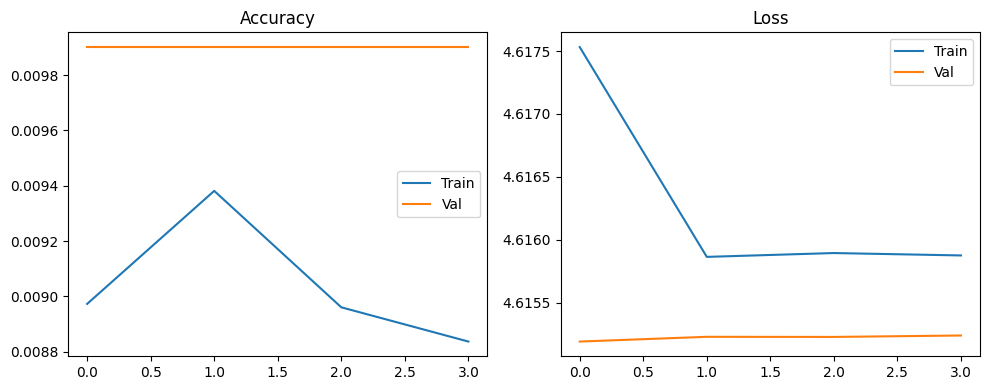

316/316 ━━━━━━━━━━━━━━━━━━━━ 45s 143ms/step - accuracy: 0.0091 - loss: 4.6153
Test Accuracy: 0.0099
Best Val Accuracy: 0.0099


In [ ]:
custom_model_1 = models.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.Conv2D(16, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

custom_model_1.compile(
    optimizer=optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

custom_model_1.summary()

# Applied Early Stopping

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

history = custom_model_1.fit(
    train_tf,
    validation_data=val_tf,
    epochs=20,
    callbacks=[early_stop],
    verbose=1
)

# Visualization

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train", "Val"])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["Train", "Val"])

plt.tight_layout()
plt.show()

# Test Evaluation

test_loss, test_acc = custom_model_1.evaluate(test_tf)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Best Val Accuracy: {max(history.history['val_accuracy']):.4f}")

Accuracy is the same as baseline. Will need to make model more complex.

### Custom Model 2 -- Adding a 2 more Conv2D layers, Global Average Pooling, and expanding Dense layer

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 101)            │         6,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 413,349 (1.58 MB)

 Trainable params: 412,389 (1.57 MB)

 Non-trainable params: 960 (3.75 KB)

Epoch 1/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 432s 150ms/step - accuracy: 0.0264 - loss: 4.5342 - val_accuracy: 0.0924 - val_loss: 4.0380
Epoch 2/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 405s 144ms/step - accuracy: 0.0910 - loss: 3.9967 - val_accuracy: 0.1810 - val_loss: 3.5168
Epoch 3/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 403s 143ms/step - accuracy: 0.1526 - loss: 3.6181 - val_accuracy: 0.2024 - val_loss: 3.3586
Epoch 4/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 403s 143ms/step - accuracy: 0.2013 - loss: 3.3417 - val_accuracy: 0.2594 - val_loss: 3.0529
Epoch 5/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 404s 143ms/step - accuracy: 0.2433 - loss: 3.1264 - val_accuracy: 0.2983 - val_loss: 2.8425
Epoch 6/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 405s 143ms/step - accuracy: 0.2739 - loss: 2.9701 - val_accuracy: 0.3073 - val_loss: 2.8426
Epoch 7/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 402s 142ms/step - accuracy: 0.2962 - loss: 2.8493 - val_accuracy: 0.3520 - val_loss: 2.6236
Epoch 8/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 404s 143ms/s

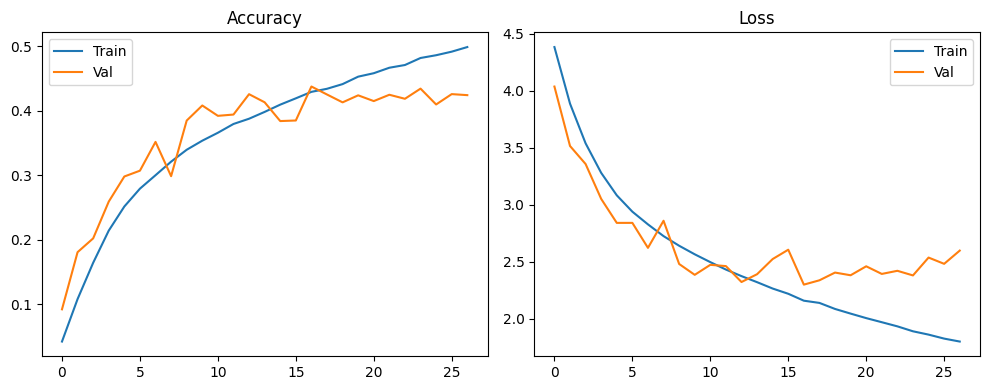

316/316 ━━━━━━━━━━━━━━━━━━━━ 45s 141ms/step - accuracy: 0.4249 - loss: 2.3034
Test Accuracy: 0.4223
Best Val Accuracy: 0.4378


In [ ]:
he = initializers.HeNormal()

custom_model_2 = models.Sequential([
    layers.Input(shape=(224,224,3)),
    layers.Conv2D(32, (3,3), activation='relu', kernel_initializer=he, padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(64, (3,3), activation='relu', kernel_initializer=he, padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(128, (3,3), activation='relu', kernel_initializer=he, padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.Conv2D(256, (3,3), activation='relu', kernel_initializer=he, padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D(2,2),

    layers.GlobalAveragePooling2D(),

    layers.Dense(64, activation='relu', kernel_initializer=he),
    Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

custom_model_2.compile(
    optimizer=optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

custom_model_2.summary()

# Applied Early Stopping

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = custom_model_2.fit(
    train_tf,
    validation_data=val_tf,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# Visualization

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train", "Val"])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["Train", "Val"])

plt.tight_layout()
plt.show()

# Test Evaluation

test_loss, test_acc = custom_model_2.evaluate(test_tf)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Best Val Accuracy: {max(history.history['val_accuracy']):.4f}")

### Graded Questions (5 pts each)

1. **Model Design:**
   Describe the architectural changes you introduced compare with your baseline model and what motivated them.

3.1. **Your answer here:**

In Custom Model 1, I added an additional convolutional and Dense layer which did not improve the accuracy compared to the baseline model. In Custom Model 2, 2 extra convolutional bockes were added, increasing the filter count from 16 to 256 across the network. This was motivated by the fact that the baseline model and Custom Model 1 were both severely underfitted. I had also replaced the Flatten layer with a GlobalAveragePooling2D layer to drastically reduce the model's trainable parameters and minize overfitting. BatchNormalization layers were also added after each convolution to stablize and accelerate training. Lastly, He Normal initialization was used to ensure better weight scaling in this deeper network.

2. **Training Results:**
   Present key validation and test metrics. Did your modifications improve performance?

3.2. **Your answer here:**

As mentioned in question 3.1, the initial modifications added did not improve the performance at all with an accuracy of 0.009 compared to the baseline model's accuracy of 0.009. Once Custom Model 2 was run though, the performance significantly improved to 0.44. Although this accuracy value is much less than our group's target accuracy, we had to consider the tradeoff between improving accuracy vs compute resources and runtime. Running Custom Model 2 took between 2-3 hours to complete, so we decided to stop customizing the model here to avoid further runtimes.

3. **Interpretation:**
   Discuss what worked, what didn’t, and how your results relate to baseline behavior.

3.3. **Your answer here:**

Clearly the initial custom model of adding just one convolution and Dense layer did not address the severe underfitting problem seen in the baseline model. Custom Model 2 successfully addressed this problem with 3 additional convolutional layers as well as adding BatchNormalization with switching Flatten to GlobalAveragePooling2D, raising the validation accuracy from the baseline's 0.009 to 0.44. This demonstrates that model capacity was the critical limitation of the baseline architecture. The use of BatchNormalization and GAP sucessfully enabled a much deeper network without incurring excessive memory or overfitting penalties, leading to stable and measurable convergence.

4. **Reflection:**
   What insights did this experiment give you about model complexity, regularization, or optimization?

3.4. **Your answer here:**

The experiment strongly indicated that model complexity was the primary bottleneck. The baseline and Custom Model 1, both shallow CNNs, showed severe underfitting, which meant that they lacked the capacity to learn features for 101 distinct classes. The success of Custom Model 2 was primairy due to its increased depth, proving that high complexity is required.

In terms of regularization and optimization, the use of BatchNormalization was essential for stabilizing the training of the new deep network. The shift to GAP was a highly effective regularization technique, drastically cutting the parameter count from millions to hudres of thousands. This allowed the model to get deeper without overfitting from an excessive number of fully-connected weights.

## Problem 4 – Pretrained Model (Transfer Learning) (20 pts)

### Goal

Apply **transfer learning** to see how pretrained knowledge improves accuracy, convergence speed, and generalization.
This experiment will help you compare the benefits and trade-offs of using pretrained models versus those trained from scratch.


### Steps to Follow

1. **Select a pretrained architecture**

   * **Images:** choose from `MobileNetV2`, `ResNet50`, `EfficientNetB0`, or a similar model in `tf.keras.applications`.
   * **Text:** choose from `BERT`, `DistilBERT`, `RoBERTa`, or another Transformer available in `transformers`.

2. **Adapt the model for your dataset**

   * Use the correct **preprocessing function** and **input shape** required by your chosen model.
   * Replace the top layer with your own **classification head** (e.g., `Dense(num_classes, activation='softmax')`).

3. **Apply transfer learning**

   * Choose an appropriate **training strategy** for your pretrained model. Options include:

     * **Freezing** the pretrained base and training only a new classification head.
     * **Partially fine-tuning** selected upper layers of the base model.
     * **Full fine-tuning** (all layers trainable) with a reduced learning rate.
   * Adjust your learning rate schedule to match your strategy (e.g., smaller LR for fine-tuning).
   * Observe how your chosen approach affects **validation loss**, **training time**, and **model stability**.

4. **Train and evaluate under consistent conditions**

   * Use the same **splits**, **metrics**, and **evaluation protocol** as in earlier problems.
   * Record training duration, validation/test performance, and any resource constraints (GPU memory, runtime).

5. **Compare and analyze**

   * Observe how transfer learning changes both **performance** and **efficiency** relative to your baseline and custom models.
   * Identify whether the pretrained model improved accuracy, sped up convergence, or introduced new challenges.


In [ ]:
def make_base_model_pooled(trainable=False):
    base = EfficientNetB0(
        weights='imagenet', include_top=False,
        input_shape=(224,224,3), pooling='avg'
    )
    base.trainable = trainable
    return base

base = make_base_model_pooled()

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


### Base Model -- Frozen Backbone

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 101)            │        25,957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,408,584 (16.82 MB)

 Trainable params: 356,453 (1.36 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

Epoch 1/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 480s 158ms/step - accuracy: 0.0097 - loss: 4.7438 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 2/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 408s 145ms/step - accuracy: 0.0085 - loss: 4.6164 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 3/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 407s 144ms/step - accuracy: 0.0097 - loss: 4.6159 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 4/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 407s 144ms/step - accuracy: 0.0088 - loss: 4.6159 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 5/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 408s 144ms/step - accuracy: 0.0095 - loss: 4.6160 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 6/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 407s 144ms/step - accuracy: 0.0089 - loss: 4.6160 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 7/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 407s 144ms/step - accuracy: 0.0085 - loss: 4.6159 - val_accuracy: 0.0099 - val_loss: 4.6152
Epoch 8/10
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 409s 145ms/step - ac

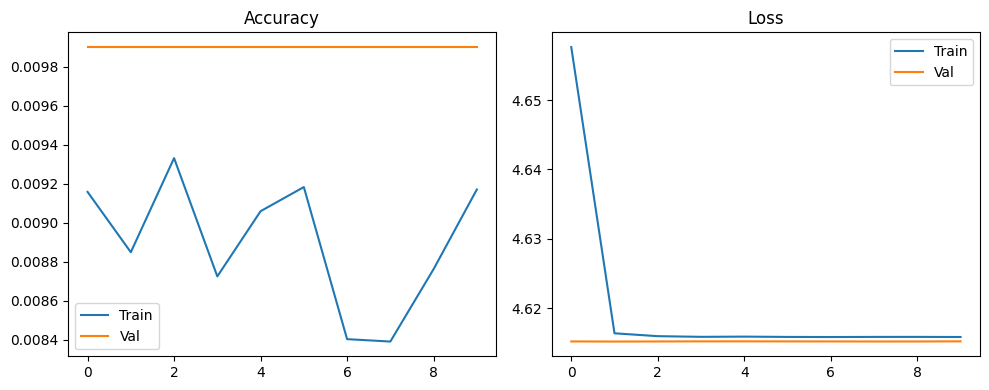

316/316 ━━━━━━━━━━━━━━━━━━━━ 45s 142ms/step - accuracy: 0.0091 - loss: 4.6154
Test Accuracy: 0.0099
Best Val Accuracy: 0.0099


In [ ]:
base_model = make_base_model_pooled()               # default: trainable=False

model_baseline = models.Sequential([
    base_model,
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model_baseline.compile(
    optimizer=optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_baseline.summary()

# Applied Early Stopping

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model_baseline.fit(
    train_tf,
    validation_data=val_tf,
    epochs=10,
    callbacks=[early_stop],
    verbose=1
)

# Visualization

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train", "Val"])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["Train", "Val"])

plt.tight_layout()
plt.show()

# Test Evaluation

test_loss, test_acc = model_baseline.evaluate(test_tf)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Best Val Accuracy: {max(history.history['val_accuracy']):.4f}")

### Model 2 -- Frozen Backbone with Exponential Decay

In [ ]:
epochs = 100               # You'll need to adjust this to close to be close to the early stopping location
batch_size = 128

# Needed by LR schedulers

steps_per_epoch = int(np.ceil(len(train_set) / batch_size))
total_steps = epochs * steps_per_epoch

exp_decay = ExponentialDecay(
    initial_learning_rate=0.00001,  #  the starting learning rate (before any decay)
    decay_steps=total_steps,     #  how many training steps (batches) before applying decay
    decay_rate=0.98,              #  multiplicative factor of decay (new_lr = lr * decay_rate^(step/decay_steps))
    staircase=False,             #  if True, decay in discrete intervals (floor(step/decay_steps)),
                                 #  if False, decay smoothly each step
)

cosine_decay = CosineDecay(
    initial_learning_rate=0.00001, #  the starting learning rate
    decay_steps=total_steps,      #  number of training steps (batches) over which to decay
    alpha=0.0,                    #  minimum learning rate value as a fraction of initial_learning_rate
                                  #  (final_lr = initial_lr * alpha)
)

In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',    # Quantity to be monitored.
    factor=0.5,            # Factor by which the learning rate will be reduced.
                           # new_lr = lr * factor
    patience=3,            # Number of epochs with no improvement
                           # after which learning rate will be reduced.
    min_delta=1e-7,        # Threshold for measuring the new optimum,
                           # to only focus on significant changes.
    cooldown=0,            # Number of epochs to wait before resuming
                           # normal operation after lr has been reduced.
    min_lr=1e-8,           # Lower bound on the learning rate.
    verbose=0,             # 0: quiet, 1: update messages.
)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 101)            │        25,957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,408,584 (16.82 MB)

 Trainable params: 356,453 (1.36 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

Epoch 1/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 444s 150ms/step - accuracy: 0.0101 - loss: 4.7366 - val_accuracy: 0.0105 - val_loss: 4.6158
Epoch 2/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 411s 146ms/step - accuracy: 0.0099 - loss: 4.6498 - val_accuracy: 0.0100 - val_loss: 4.6144
Epoch 3/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 411s 146ms/step - accuracy: 0.0100 - loss: 4.6352 - val_accuracy: 0.0106 - val_loss: 4.6131
Epoch 4/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 413s 147ms/step - accuracy: 0.0113 - loss: 4.6282 - val_accuracy: 0.0107 - val_loss: 4.6118
Epoch 5/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 411s 146ms/step - accuracy: 0.0112 - loss: 4.6246 - val_accuracy: 0.0097 - val_loss: 4.6107
Epoch 6/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 412s 146ms/step - accuracy: 0.0121 - loss: 4.6214 - val_accuracy: 0.0111 - val_loss: 4.6098
Epoch 7/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 411s 146ms/step - accuracy: 0.0119 - loss: 4.6191 - val_accuracy: 0.0127 - val_loss: 4.6092
Epoch 8/100
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 410s 145ms/s

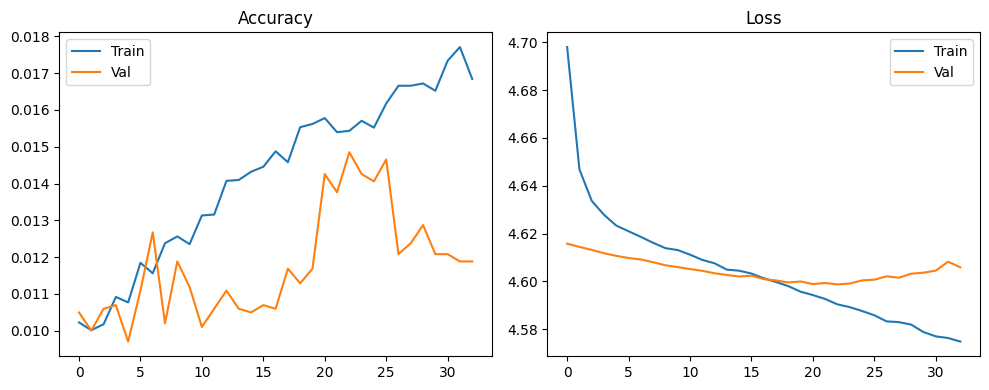

316/316 ━━━━━━━━━━━━━━━━━━━━ 45s 143ms/step - accuracy: 0.0170 - loss: 4.5982
Test Accuracy: 0.0144
Best Val Accuracy: 0.0149


In [ ]:
model2 = make_base_model_pooled()               # default: trainable=False

model_2 = models.Sequential([
    model2,
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model_2.compile(
    optimizer=optimizers.Adam(exp_decay),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_2.summary()

# Applied Early Stopping

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model_2.fit(
    train_tf,
    validation_data=val_tf,
    epochs=100,
    callbacks=[early_stop],
    verbose=1
)

# Visualization

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train", "Val"])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["Train", "Val"])

plt.tight_layout()
plt.show()

# Test Evaluation

test_loss, test_acc = model_2.evaluate(test_tf)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Best Val Accuracy: {max(history.history['val_accuracy']):.4f}")

### Model 3 -- Unfrozen Backbone with Cosine Decay

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 101)            │        25,957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,408,584 (16.82 MB)

 Trainable params: 4,364,001 (16.65 MB)

 Non-trainable params: 44,583 (174.16 KB)

Epoch 1/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 498s 152ms/step - accuracy: 0.3435 - loss: 2.9255 - val_accuracy: 0.0095 - val_loss: 9.7269
Epoch 2/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 416s 148ms/step - accuracy: 0.5878 - loss: 1.6294 - val_accuracy: 0.0160 - val_loss: 6.2246
Epoch 3/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 423s 150ms/step - accuracy: 0.6420 - loss: 1.4007 - val_accuracy: 0.0039 - val_loss: 13.2681
Epoch 4/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 418s 149ms/step - accuracy: 0.6791 - loss: 1.2347 - val_accuracy: 0.0120 - val_loss: 4.8612
Epoch 5/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 426s 152ms/step - accuracy: 0.7175 - loss: 1.0686 - val_accuracy: 0.0105 - val_loss: 4.9606
Epoch 6/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 451s 160ms/step - accuracy: 0.7497 - loss: 0.9336 - val_accuracy: 0.0220 - val_loss: 5.7434
Epoch 7/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 420s 149ms/step - accuracy: 0.7805 - loss: 0.8126 - val_accuracy: 0.0100 - val_loss: 5.3226
Epoch 8/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 426s 152ms/step - a

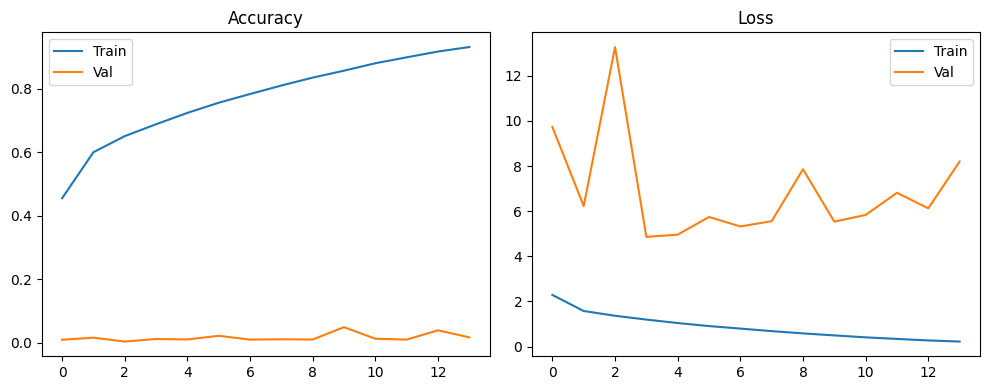

316/316 ━━━━━━━━━━━━━━━━━━━━ 45s 142ms/step - accuracy: 0.0123 - loss: 4.8656
Test Accuracy: 0.0124
Best Val Accuracy: 0.0492


In [ ]:
model3 = make_base_model_pooled(trainable=True)               # default: trainable=False

model_3 = models.Sequential([
    model3,
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model_3.compile(
    optimizer=optimizers.Adam(cosine_decay),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_3.summary()

# Applied Early Stopping

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model_3.fit(
    train_tf,
    validation_data=val_tf,
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

# Visualization

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train", "Val"])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["Train", "Val"])

plt.tight_layout()
plt.show()

# Test Evaluation

test_loss, test_acc = model_3.evaluate(test_tf)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Best Val Accuracy: {max(history.history['val_accuracy']):.4f}")

This model was severely overifitted as test accuracy was so high around 0.8-0.9 but validation accuracy remained low at around 0.0170. Likely due to unfreezing the entire backbone. Will try partially unfreezing backbone.

### Model 4 -- Partial Unfrozen Backbone (N=20)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 101)            │        25,957 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,408,584 (16.82 MB)

 Trainable params: 356,453 (1.36 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


   2525/Unknown 386s 127ms/step - accuracy: 0.0098 - loss: 4.7932

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:160: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


2525/2525 ━━━━━━━━━━━━━━━━━━━━ 443s 150ms/step - accuracy: 0.0098 - loss: 4.7932 - val_accuracy: 0.0125 - val_loss: 4.6204
Epoch 2/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 409s 145ms/step - accuracy: 0.0108 - loss: 4.6662 - val_accuracy: 0.0136 - val_loss: 4.6191
Epoch 3/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 407s 144ms/step - accuracy: 0.0099 - loss: 4.6476 - val_accuracy: 0.0120 - val_loss: 4.6183
Epoch 4/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 408s 144ms/step - accuracy: 0.0102 - loss: 4.6380 - val_accuracy: 0.0109 - val_loss: 4.6173
Epoch 5/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 411s 146ms/step - accuracy: 0.0107 - loss: 4.6327 - val_accuracy: 0.0096 - val_loss: 4.6164
Epoch 6/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 413s 147ms/step - accuracy: 0.0107 - loss: 4.6308 - val_accuracy: 0.0111 - val_loss: 4.6155
Epoch 7/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 408s 145ms/step - accuracy: 0.0121 - loss: 4.6256 - val_accuracy: 0.0111 - val_loss: 4.6149
Epoch 8/50
2525/2525 ━━━━━━━━━━━━━━━━━━━━ 407s 144ms/step - accuracy: 0.0

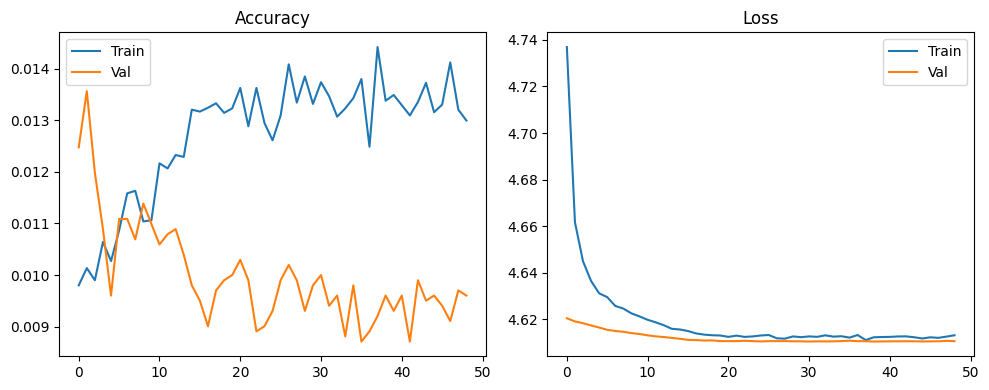

316/316 ━━━━━━━━━━━━━━━━━━━━ 46s 146ms/step - accuracy: 0.0129 - loss: 4.6105
Test Accuracy: 0.0116
Best Val Accuracy: 0.0136


In [ ]:
N = 20
model4 = make_base_model_pooled()
base_model.trainable = True
for layer in base_model.layers[:-N]:
  layer_trainable = False

model_4 = models.Sequential([
    model4,
    layers.BatchNormalization(),
    layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

model_4.compile(
    optimizer=optimizers.Adam(cosine_decay),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model_4.summary()

# Applied Early Stopping

early_stop = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model_4.fit(
    train_tf,
    validation_data=val_tf,
    epochs=50,
    callbacks=[early_stop],
    verbose=1
)

# Visualization

plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.legend(["Train", "Val"])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss")
plt.legend(["Train", "Val"])

plt.tight_layout()
plt.show()

# Test Evaluation

test_loss, test_acc = model_4.evaluate(test_tf)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Best Val Accuracy: {max(history.history['val_accuracy']):.4f}")

This took 5 hours and all 50 epochs. Still low accuracy.

### Graded Questions (5 pts each)

1. **Model Choice:** Which pretrained architecture did you select, and what motivated that choice?

4.1. **Your answer here:**

We chose to choose the EffecientNetB0 as the pretrained architecture because, after some research on the different pretrained architectures, EfficientNetB0 was found to have the best efficiency-to-accuracy trade-off. Given the complexity of the Food-101 dataset and the constraint of running a full training pipeline on a Google Colab environment, EfficientNetB0 was chosen as the most ideal architecture for transfer learning.

2. **Fine-Tuning Plan:** Describe your fine-tuning strategy and why you chose it.

4.2. **Your answer here:**

The chosen fine-tuning strategy was to initially use the Frozen Backbone, where the entire pretrained EfficientNetB0 base model was frozen and the new, custom classification head was the only one being trained. This approach was chosen to drastically reduce the number of trainable parameters to a manageable number. After running a Frozen Backbone model, we ran a completely unfrozen backbone. This was done to allow the model to have maximum accuracy with optimal fit. Lastly, a partially unfrozen backbone model was run where 20 layers were unfrozen. This allowed the model to preserve low-level features while adapting to the high-level features.

3. **Performance:** Report key metrics and compare them with your baseline and custom models.

4.3. **Your answer here:**

After running the 3-4 different models with different freezing statuses, the accruacies for all models were found to be insufficient, around 0.009-0.01. These accuracies are similar to the accuracies of the baseline model and Custom Model 1. One interesting finding was that the completely unfrozen backbone model revealed to be severely overfitting as the test accuracies were around 0.9 while validation accuracy remained around 0.01. We attempted to mitigate this by partially unfreezing some layers, which did not prove to be helpful as the validation accuracy remained at 0.01.

4. **Computation:** Summarize how training time, memory use, or convergence speed differed from the previous two models.

4.4. **Your answer here:**

The runtime for the frozen and completely unfrozen backbone models were around the same time as Custom Model 2's runtime, 2-3 hours, and stopped at a resonable epoch (33 for the frozen backbone model and 14 for the completely unfrozen backbone model). However, the runtime for the partially unfrozen model was the longest, at around 5 hours, and lasting for 49/50 epochs. This model had the longest runtime out of all models in this project, especially since the baseline and Custom Model 1 runtimes were only about 30 minutes. Due to uncertainty about future runtime and early stopping for other partially unfrozen backbone models (ie. if N=40 or 60), no other models were tested.

## Problem 5 – Comparative Evaluation and Discussion (20 pts)

### Goal

Compare your **baseline**, **custom**, and **pretrained** models to evaluate how design choices affected performance, efficiency, and generalization.
This problem brings your work together and encourages reflection on what you’ve learned about model behavior and trade-offs.

**Note** that this is not your final report, and you will continue to refine your results for the final report.

### Steps to Follow

1. **Compile key results**

   * Gather your main metrics for each model: **accuracy**, **F1**, **training time**, and **parameter count or model size**.
   * Ensure all numbers come from the same evaluation protocol and test set.

2. **Visualize the comparison**

   * Present results in a **single, well-organized chart or table**.
   * Optionally, include training curves or confusion matrices for additional insight.

3. **Analyze comparative performance**

   * Observe which model performed best by your chosen metric(s).
   * Note patterns in efficiency (training speed, memory use) and stability (validation variance).

4. **Inspect model behavior**

   * Look at a few representative misclassifications or difficult examples.
   * Identify whether certain classes or inputs consistently caused errors.

5. **Plan forward improvements**

   * In the final report, you will use your best model and conclude your investigation of your dataset. Based on your observations, decide on a model and next steps for refining your approach in the final project (e.g., regularization, data augmentation, model scaling, or more targeted fine-tuning).

### Graded Questions (4 pts each)

1. **Summary Table and Performance Analysis:** Present a clear quantitative comparison of all three models. Which model achieved the best overall results, and what factors contributed to its success?

5.1. **Your answer here:**
Custom Model 2 achieved the best results by far, reaching 43.78% validation accuracy with only 413K parameters over 27 epochs in 2-3 hours. In stark contrast, the baseline model, Custom Model 1, and all three EfficientNetB0 transfer learning variants (frozen, fully unfrozen, and partially unfrozen) failed completely with validation accuracies around 0.99-1.44%—essentially random guessing on 101 classes. Custom Model 2's success stemmed from three key factors: sufficient depth with four convolutional blocks to capture hierarchical features, effective regularization through batch normalization and global average pooling that prevented overfitting, and appropriate architectural capacity that balanced complexity with the dataset's demands without the optimization difficulties that plagued the pretrained models.


2. **Trade-Offs:** Discuss how complexity, accuracy, and efficiency balanced across your models.

5.2. **Your answer here:**
The experiments revealed a clear relationship between model complexity, accuracy, and efficiency. The baseline and Custom Model 1 represented the extreme of simplicity—training in just 30 minutes with minimal parameters—but their severe underfitting demonstrated that insufficient complexity is fatal for fine-grained classification tasks. Custom Model 2 struck an effective balance: its 413K parameters and 2-3 hour training time represented moderate computational cost, yet its four-layer architecture provided enough capacity to achieve 44% accuracy, proving that thoughtful architectural design matters more than raw parameter count. The transfer learning models paradoxically showed that more complexity doesn't guarantee better results—despite having 4.4M total parameters and comparable or longer training times (2-5 hours), they completely failed to learn, suggesting that pretrained ImageNet features didn't transfer well to food classification or that optimization challenges with frozen/unfrozen layers prevented effective learning. This reveals a critical insight: there's a "Goldilocks zone" of complexity where models have sufficient capacity without introducing optimization difficulties or overfitting, and Custom Model 2 found that sweet spot for this particular dataset and computational environment.


3. **Error Patterns:** Describe the types of examples or classes that remained challenging for all models.

5.3. **Your answer here:**
Given that most models failed to learn anything meaningful (achieving only random-guess accuracy around 1%), it's difficult to identify specific error patterns since they misclassified virtually everything. However, Custom Model 2's 44% accuracy suggests it still struggled significantly with the inherent challenges of Food-101's fine-grained classification task. The dataset contains visually similar food categories that likely confused the model—distinguishing between different pasta dishes (spaghetti bolognese vs. carbonara), various fried items (fried calamari vs. onion rings), or similar plated desserts (different types of cakes or pastries) requires learning subtle differences in ingredients, sauces, and presentation styles. Additionally, high intra-class variability from different lighting conditions, plating styles, camera angles, and regional preparation methods likely made it difficult for Custom Model 2 to generalize, explaining why even the best-performing model only achieved moderate accuracy on this challenging fine-grained visual recognition task.


4. **Next Steps:** Based on these findings, decide on a model to go forward with and outline your plan for improving that model.


5.4 **Your answer here:**

Based on the results across all models, Custom Model 2 is the clear choice moving forward because it was the only model that learned meaningful patterns from the data, achieving roughly 44% validation accuracy while every other model including the baseline models and all pretrained EfficientNetB0 variations remained stuck around 1%, essentially performing random guessing. Its balanced design of four convolutional blocks, batch normalization, global average pooling, and moderate regularization gave it enough representational power without the instability or optimization breakdowns seen in the transfer learning experiments. To improve this model further, the next steps will focus on strengthening generalization and refining training stability rather than increasing complexity. This includes applying stronger data augmentation techniques such as color jitter, cutout, mixup, and random erasing; experimenting with learning-rate schedules like cosine decay with warm restarts; increasing the input resolution for finer-grained classification; incorporating lightweight attention modules such as SE blocks or CBAM; and possibly exploring selective transfer learning by initializing only the earliest convolutional layers with pretrained ImageNet weights. Overall, the plan is to refine and enhance Custom Model 2’s strengths rather than replace it, building on the architecture that already demonstrated the capability to learn this challenging dataset.

### Final Question: Describe what use you made of generative AI tools in preparing this Milestone.

**AI Question: Your answer here:**

we used generative AI tools sparingly and only as a supplemental resource to help us understand concepts, troubleshoot errors, and clarify parts of the assignment when we were unsure. We relied on AI mainly to double check our reasoning, interpret confusing warnings from TensorFlow, and confirm that our training pipelines or learning-rate schedules were set up correctly. All final models, experiments, hyperparameter decisions, and written explanations were created and run by our group members ourselves. The results, code, plots, and comparative analysis all come directly from our own work in Google Colab. AI tools supported our learning process, but the actual implementation and interpretation of the project were completed by us as a team